In [16]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import statsmodels
%matplotlib inline
import warnings                   
warnings.filterwarnings("ignore")
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 7

# Hourly Dataset Transformation and Exploration

In [17]:
df = pd.read_csv('hourly_sales_dataset.csv')

In [18]:
df.head(10)

,Date,Sales
0,2018-08-31 21:00,49.30
1,2018-08-31 22:00,163.20
2,2018-08-31 23:00,219.41
3,2018-09-01 00:00,580.91
4,2018-09-01 01:00,482.20
5,2018-09-01 02:00,261.30
6,2018-09-01 03:00,283.31
7,2018-09-01 04:00,25.10
8,2018-09-01 20:00,45.66
9,2018-09-01 21:00,71.87


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3335 entries, 0 to 3334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3335 non-null   object 
 1   Sales   3335 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.1+ KB


In [20]:
df.tail(10)

,Date,Sales
3325,2019-09-19 04:00,160.22
3326,2019-09-19 05:00,11.57
3327,2019-09-19 20:00,10.44
3328,2019-09-19 21:00,90.56
3329,2019-09-19 22:00,589.76
3330,2019-09-19 23:00,417.04
3331,2019-09-20 00:00,452.67
3332,2019-09-20 01:00,466.72
3333,2019-09-20 02:00,602.93
3334,2019-09-20 03:00,159.00


In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [22]:
df.head(10)

,Sales
Date,
2018-08-31 21:00:00,49.30
2018-08-31 22:00:00,163.20
2018-08-31 23:00:00,219.41
2018-09-01 00:00:00,580.91
2018-09-01 01:00:00,482.20
2018-09-01 02:00:00,261.30
2018-09-01 03:00:00,283.31
2018-09-01 04:00:00,25.10
2018-09-01 20:00:00,45.66


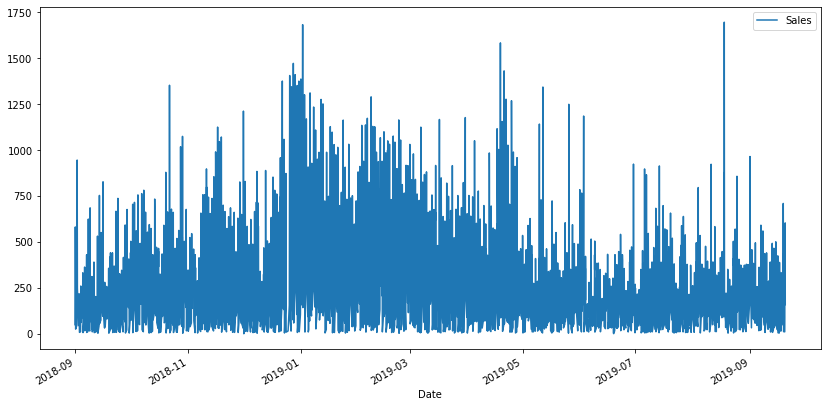

In [23]:
df.plot()

In [24]:
##Testing for stationarity 

from statsmodels.tsa.stattools import adfuller

In [25]:
test_result=adfuller(df['Sales'])

In [26]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistics', 'p-value', '#Lags Used', 'Number of observations used']
    for value, label in zip(result,labels):
        print(label+ ' : '+str(value))
    if result[1]<=0.05:
        print("Strong Evidence Against The NULL Hypothesis(H0), reject the null hypothesis. Data has no unit root, it's stationary")
    else:
        print("Weak Evidence Against NULL Hypothesis, time series has a unit root, indicating it's non stationary")

In [27]:
adfuller_test(df['Sales'])

ADF Test Statistics : -4.584509945764457
p-value : 0.0001379330031615728
#Lags Used : 29
Number of observations used : 3305
Strong Evidence Against The NULL Hypothesis(H0), reject the null hypothesis. Data has no unit root, it's stationary


In [28]:
##Determining rolling statistics to check stationarity of the data

In [29]:
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
print(rolmean, rolstd)

                          Sales
Date                           
2018-08-31 21:00:00         NaN
2018-08-31 22:00:00         NaN
2018-08-31 23:00:00         NaN
2018-09-01 00:00:00         NaN
2018-09-01 01:00:00         NaN
...                         ...
2019-09-19 23:00:00  329.594167
2019-09-20 00:00:00  331.326667
2019-09-20 01:00:00  343.580000
2019-09-20 02:00:00  347.095000
2019-09-20 03:00:00  301.273333

[3335 rows x 1 columns]                           Sales
Date                           
2018-08-31 21:00:00         NaN
2018-08-31 22:00:00         NaN
2018-08-31 23:00:00         NaN
2018-09-01 00:00:00         NaN
2018-09-01 01:00:00         NaN
...                         ...
2019-09-19 23:00:00  238.637213
2019-09-20 00:00:00  239.521144
2019-09-20 01:00:00  242.612325
2019-09-20 02:00:00  246.321943
2019-09-20 03:00:00  222.941046

[3335 rows x 1 columns]


In [30]:
##Plot Rolling Statistics

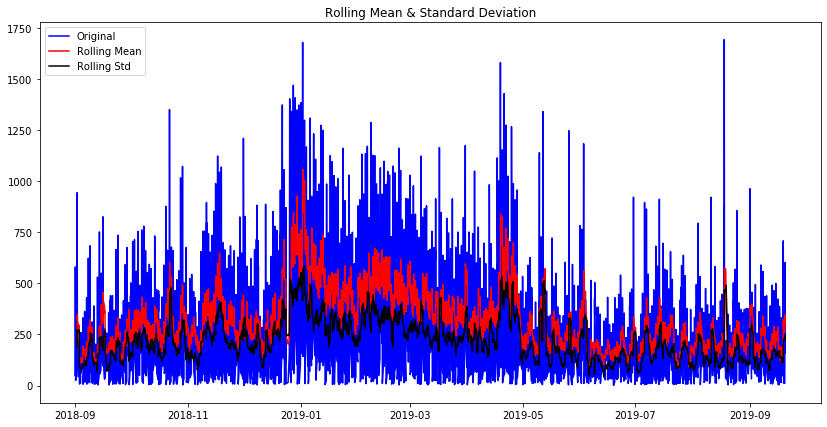

In [32]:
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [33]:
##Performing Dickey-Fuller test

In [35]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df['Sales'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistics                  -4.584510
p-value                           0.000138
#Lags Used                       29.000000
Number of Observations Used    3305.000000
Critical Value (1%)              -3.432330
Critical Value (5%)              -2.862415
Critical Value (10%)             -2.567236
dtype: float64


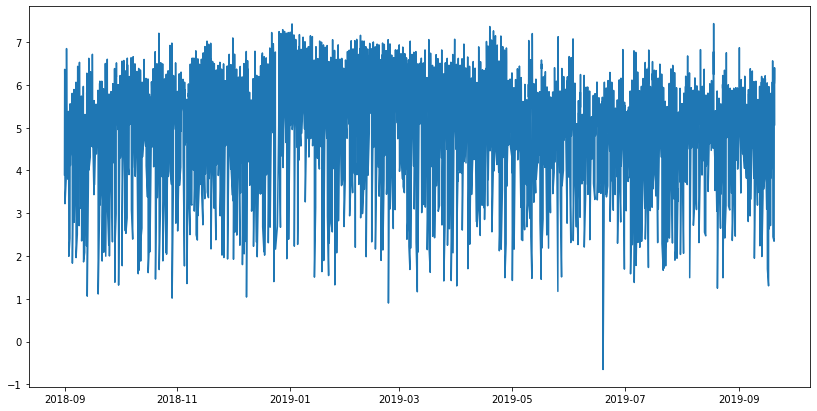

In [36]:
# Dickey-Fuller test results
#Estimating Trend

df_logScale = np.log(df)
plt.plot(df_logScale)

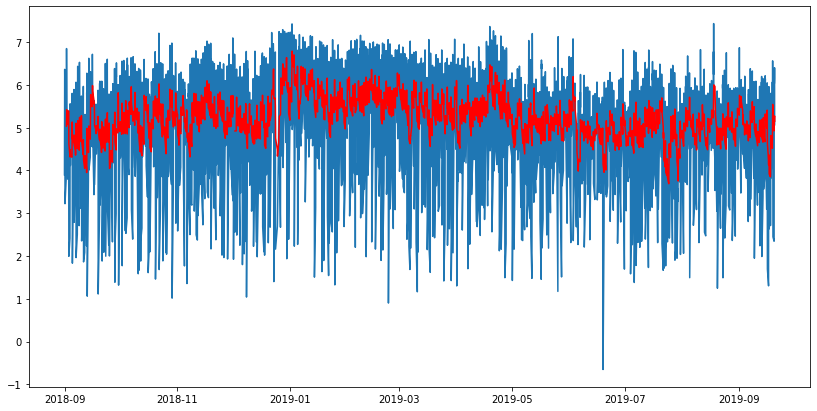

In [38]:
#Calculating moving average 
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')

In [39]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
                
#Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

#Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

#Perform Dickey-Fuller Test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    
    print(dfoutput)


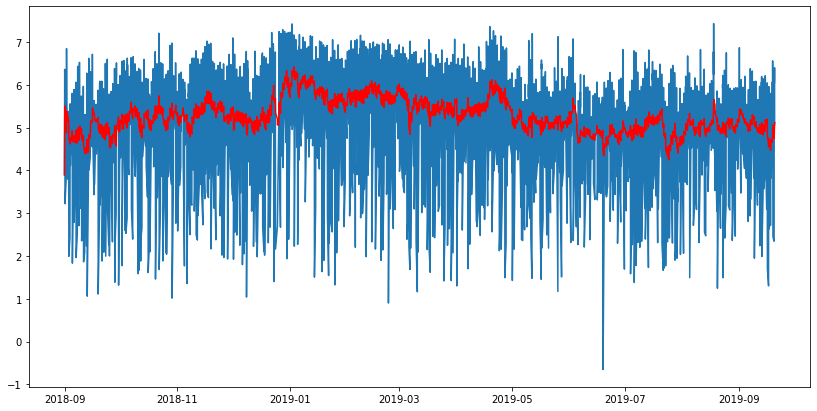

In [41]:
exponentialDecayWeightedAverage = df_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

In [45]:
df.head(15)

,Sales
Date,
2018-08-31 21:00:00,49.30
2018-08-31 22:00:00,163.20
2018-08-31 23:00:00,219.41
2018-09-01 00:00:00,580.91
2018-09-01 01:00:00,482.20
2018-09-01 02:00:00,261.30
2018-09-01 03:00:00,283.31
2018-09-01 04:00:00,25.10
2018-09-01 20:00:00,45.66


In [46]:
df_logScale.head(10)

,Sales
Date,
2018-08-31 21:00:00,3.897924
2018-08-31 22:00:00,5.094976
2018-08-31 23:00:00,5.390942
2018-09-01 00:00:00,6.364596
2018-09-01 01:00:00,6.178359
2018-09-01 02:00:00,5.565669
2018-09-01 03:00:00,5.646542
2018-09-01 04:00:00,3.222868
2018-09-01 20:00:00,3.821223


In [51]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [63]:
df.loc['2018-08-31' : '2019-09-20'].head(10)

,Sales
Date,
2018-08-31 21:00:00,49.30
2018-08-31 22:00:00,163.20
2018-08-31 23:00:00,219.41
2018-09-01 00:00:00,580.91
2018-09-01 01:00:00,482.20
2018-09-01 02:00:00,261.30
2018-09-01 03:00:00,283.31
2018-09-01 04:00:00,25.10
2018-09-01 20:00:00,45.66


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3335 entries, 2018-08-31 21:00:00 to 2019-09-20 03:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   3335 non-null   float64
dtypes: float64(1)
memory usage: 180.1 KB


In [69]:
df.head(2668).to_csv(r'../SciPY/train_data.csv')

In [70]:
df.tail(667).to_csv(r'../SciPY/test_data.csv')